In [733]:
from scipy.io import wavfile
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import Classifier1
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import sklearn.preprocessing
from sklearn.model_selection import KFold
from sklearn import metrics
from matplotlib.colors import ListedColormap
from IPython.display import Image
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn import datasets
%matplotlib inline

In [734]:
time_event = [20000, 45000, 70000, 90000, 110000]
waveLeft = np.load('E:/2020_semeter_1/data3888/brainboxgamegroup/DATA3888-PHYS3888/data/group_wave/Left5.npy')
left_event = []

for i in time_event:
    left_event.append(waveLeft[i-5000:i+5000])
    
reduced_left = []


for i in range(len(left_event)):
    
    a = left_event[i]
    
    b = np.array([a[j] for j in range(len(a)) if j % 5 == 0], dtype= np.float32)
    
    reduced_left.append(b)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


In [735]:
time_event_LR = [55000, 70000, 90000, 105000, 125000, 145000, 160000, 180000, 200000, 219000, 237000, 257000, 275000, 290000, 305000, 320000, 340000, 365000, 382000, 400000]
waveLeft = np.load('E:/2020_semeter_1/data3888/brainboxgamegroup/DATA3888-PHYS3888/data/group_wave/LLLLRRRRRRRRLLRRRRLL.npy')
left_right_event = []

for i in time_event_LR:
    left_right_event.append(waveLeft[i-5000:i+5000])
    
reduced_left_right = []


for i in range(len(left_right_event)):
    
    a = left_right_event[i]
    
    b = np.array([a[j] for j in range(len(a)) if j % 5 == 0], dtype= np.float32)
    
    reduced_left_right.append(b)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


In [736]:
waveRight = np.load('E:/2020_semeter_1/data3888/brainboxgamegroup/DATA3888-PHYS3888/data/group_wave/Right5.npy')
time_right = [21000, 46000, 65000, 90000, 110000]
right_event = []

for i in time_right:
    
    right_event.append(waveRight[i-5000:i+5000])
    
    
reduced_right = []


for i in range(len(right_event)):
    
    a = right_event[i]
    b = np.array([a[j] for j in range(len(a)) if j % 5 == 0], dtype= np.float32)
   
    reduced_right.append(b)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


In [737]:
# len(reduced_right[-1])

In [738]:
waveNone = np.load('E:/2020_semeter_1/data3888/brainboxgamegroup/DATA3888-PHYS3888/data/group_wave/Straight5seconds.npy')
time_none =[5000, 15000, 25000, 35000, 40000]
none_event = []

for i in time_none:
    
    none_event.append(waveNone[i-5000:i+5000])
    
    
    
reduced_none = []

for i in range(len(none_event)):
    a = none_event[i]
    b = np.array([a[j] for j in range(len(a)) if j % 5 == 0], dtype= np.float32)
    reduced_none.append(b)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


In [739]:
columns = [str(i) for i in range(2000)]
columns.append("class")
df = pd.DataFrame(columns=columns , index = [i for i in range(35)])

In [740]:
idx = 0
for i in range(0,15,3):
    
    df.iloc[i] = np.append(reduced_right[idx],0)  #0 = R
    df.iloc[i+1] = np.append(reduced_left[idx],1) # 1 = L
    df.iloc[i+2] = np.append(reduced_none[idx],2)    #2 = None
    
    idx+= 1


for i in range(15,35):
    if (i >= 15 and i <= 18) or (i == 27 or i ==28) or(i ==33 or i ==34): 
        df.iloc[i] = np.append(reduced_left_right[i-15],1)
    else:
        df.iloc[i] = np.append(reduced_left_right[i-15],0)

In [741]:
labels = df['class'].astype(int)
df = df.drop(['class'], axis ='columns')

columns = [str(i) for i in range(10000)]
columns.append('class')
df_original = pd.DataFrame(columns=columns , index = [i for i in range(35)])

In [742]:
idx = 0
for i in range(0,15,3):
    
    df_original.iloc[i] = np.append(np.array(right_event[idx],dtype=np.float32),0)  #0 = R
    df_original.iloc[i+1] = np.append(np.array(left_event[idx],dtype=np.float32),1) # 1 = L
    df_original.iloc[i+2] = np.append(np.array(none_event[idx],dtype=np.float32),2)    #2 = None
    
    idx+= 1


for i in range(15,35):
    if (i >= 15 and i <= 18) or (i == 27 or i ==28) or(i ==33 or i ==34): 
        df_original.iloc[i] = np.append(np.array(left_right_event[i-15],dtype=np.float32),1)
    else:
        df_original.iloc[i] = np.append(np.array(left_right_event[i-15],dtype=np.float32),0)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


In [743]:
original_labels = pd.Series([i.real for i in df_original['class']], dtype=int)
# original_labels

In [744]:
x_train, x_test, y_train, y_test = train_test_split(df, labels, test_size=0.25, random_state = 10)

In [745]:
def euclideanDistance(x1, x2):
    x1, x2 = np.array(x1), np.array(x2)
    d = np.sum((x1 - x2)**2)**0.5
    return d

def scaledown(X, n, randTime, iterate, rate, verbose, d = euclideanDistance):
    
    # compute distances of high dimensional space martix
    realdist = np.array([[d(X[i], X[j]) for j in range(n)] for i in range(n)])
    realdist = realdist/np.max(realdist)  # rescale [0, 1]
    
    minerror = None
    for i in range(randTime):
        
        if verbose:
            if minerror != None:
                print("%s. Minimum Error: %s"%(i, int(minerror)))
            else:
                print("%s. Minimum Error: %s"%(i, minerror))
        
        # randomly initilalize location in 2D plane
        loc = np.array([[np.random.random(), np.random.random()] for i in range(n)])

        # start iterate
        lasterror = None
        for m in range(iterate):

            # compute 2D plane distance
            fakedist = np.array([[d(loc[i], loc[j]) for j in range(n)] for i in range(n)])

            totalerror = 0
            # compute movestep
            movestep = np.zeros_like(loc)
            for i in range(n):
                for j in range(n):                
                    if realdist[i, j] <= 0.01: 
                        continue               
                    errorrate = (fakedist[i, j] - realdist[i, j]) / fakedist[i, j]                
                    movestep[i, 0] += ((loc[i, 0] - loc[j, 0]) / fakedist[i, j])*errorrate
                    movestep[i, 1] += ((loc[i, 1] - loc[j, 1]) / fakedist[i, j])*errorrate
                    totalerror += abs(errorrate)

            if lasterror and totalerror > lasterror: 
                break  # when error is worse, stop iterating

            # update location
            loc -= rate*movestep
            lasterror = totalerror

        # save the best location
        if minerror is None or lasterror < minerror:
            finalbestloc = loc
            minerror = lasterror
            
    return finalbestloc

0. Minimum Error: None
1. Minimum Error: 843
2. Minimum Error: 799
3. Minimum Error: 773
4. Minimum Error: 773
5. Minimum Error: 773
6. Minimum Error: 773
7. Minimum Error: 773
8. Minimum Error: 773
9. Minimum Error: 769


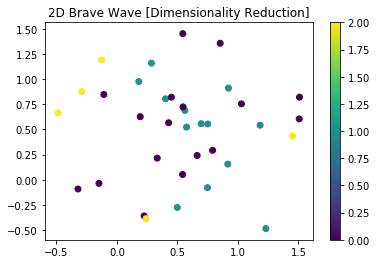

In [746]:
xCombined = np.vstack((x_train, x_test))  df  #shape of xCombined is (35,2000)
yCombined = np.hstack((y_train, y_test))   #shape of yCombined is(35,)    
loc = scaledown(xCombined, n = len(xCombined), randTime = 10, iterate = 1000, rate = 0.1, verbose = 1)

x = loc[:,0]
y = loc[:,1]
c = yCombined

fig = plt.figure()
ax = fig.add_subplot(111)
sc = ax.scatter(x, y, c = c, marker='o')  # there are only three values (0, 1, 2) in c (yCimbined), thus only three colors exist (purple， cyan， yellow)
ax.set_title('2D Brave Wave [Dimensionality Reduction]')
fig.colorbar(sc)
plt.show()

In [747]:
def plotDecisionRegions(X, y, classifier, resolution, testId):
    # Draw the decision boundary where X is feature and y is the label list. 
    # Initializes markers and their color.
    markers = ('D', '^', 's')
    colors = ('blue', 'green', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1Max, x1Min = X[:, 0].max() + 1, X[:, 0].min() - 1   # The first eigenvalue represents the x axis
    x2Max, x2Min = X[:, 1].max() + 1, X[:, 1].min() - 1   # The second eigenvalue represents the x axis
    
    x1, x2 = np.meshgrid(np.arange(x1Min, x1Max, resolution), np.arange(x2Min, x2Max, resolution))  # The reolution is grid partitioning granularity, x1 and x2 array have the same dimension
    Z = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T)   # The ravel() function is the flattening of several arrays; The function of Z is to predict two features of the combination
    Z = Z.reshape(x1.shape)   # Z is the column vector
    
    plt.contourf(x1, x2, Z, alpha = 0.3, cmap = cmap)  # Contourf (x1, x2, Z) where x1 and x2 are two isometric one-dimensional arrays, Z is a two-dimensional array, and each pair of x1, x2 has a correspondence with Z.
    
    # Use different colors to fill the area between the contuour lines
    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())
 
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], c = cmap(idx), alpha = 0.6, marker = markers[idx], label = cl)   # According to different features (x, y), use different shapes and colors to draw point in the scatter plot
    
    # highlight test samples
    if testId:
        # plot all samples
        X_test, y_test = X[testId, :], y[testId]
        
        plt.scatter(x = X_test[:, 0], y = X_test[:, 1], c = '', edgecolors = 'black', alpha = 1.0, s = 65, marker = 'o', linewidths = 2, label = 'test set')   # Set the test cases shape and color

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


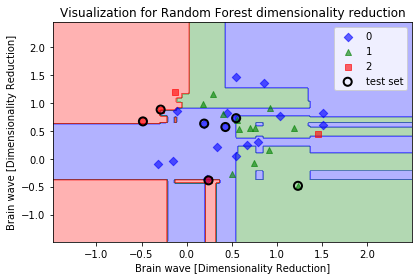

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


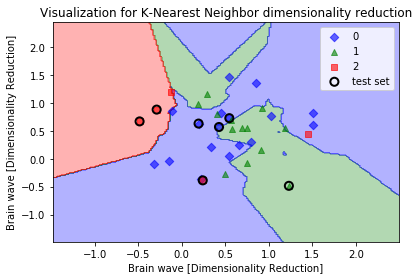

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in 

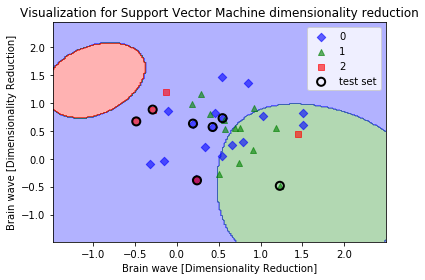

In [748]:
x_train, x_test, y_train, y_test = train_test_split(loc, c, test_size = 0.25, random_state = 10)

modelRF = RandomForestClassifier(n_estimators = 10, bootstrap = True, max_features = "sqrt")
modelRF.fit(x_train, y_train)
plotDecisionRegions(loc, c, classifier = modelRF, resolution = 0.02, testId = range(28, 35))  # test id is from 28 to 34
plt.title('Visualization for Random Forest dimensionality reduction')
plt.xlabel('Brain wave [Dimensionality Reduction]')
plt.ylabel('Brain wave [Dimensionality Reduction]')
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

modelKNN = KNeighborsClassifier(n_neighbors = 3)
modelKNN.fit(x_train, y_train)
plotDecisionRegions(loc, c, classifier = modelKNN, resolution = 0.02, testId = range(28, 35))
plt.title('Visualization for K-Nearest Neighbor dimensionality reduction')
plt.xlabel('Brain wave [Dimensionality Reduction]')
plt.ylabel('Brain wave [Dimensionality Reduction]')
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

modelSVM = SVC()
modelSVM.fit(x_train, y_train)
plotDecisionRegions(loc, c, classifier = modelSVM, resolution = 0.02, testId = range(28, 35))
plt.title('Visualization for Support Vector Machine dimensionality reduction')
plt.xlabel('Brain wave [Dimensionality Reduction]')
plt.ylabel('Brain wave [Dimensionality Reduction]')
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [749]:
modelRF = RandomForestClassifier(n_estimators = 10)

modelKNN = KNeighborsClassifier(n_neighbors = 3)

modelSVM = SVC()

In [750]:
kf = KFold(n_splits=5, shuffle=True)

In [751]:
# knn_result = []
rf_result =[]
svm_result = []
# g_result = []

In [752]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
from sklearn import tree
import pydotplus
import os  

n = 25


for i in range(n):
    
    kf = KFold(n_splits=5, shuffle=True)
    
#     knn_cv = []
    rf_cv = []
    svm_cv = []
#     g_cv = []
    
    
    for train, test in  kf.split([i for i in range(len(df))]):
        x_train, x_test, y_train, y_test = df.loc[train], df.loc[test], labels[train], labels[test]
#         x_test2, y_test2 = df_original.loc[test], original_labels[test]

        
        
        modelRF.fit(x_train, y_train)
#         modelKNN.fit(x_train, y_train)
        modelSVM.fit(x_train,y_train)
        
        rf_predict = modelRF.score(x_test, y_test)
#         knn_predict = modelKNN.score(x_test, y_test)
        svm_predict = modelSVM.score(x_test, y_test)
        
#         knn_cv.append(knn_predict)
        rf_cv.append(rf_predict)
        svm_cv.append(svm_predict)        
#         g_score = 0
        
#         for j in range(len(x_test2)):
            
#             x = x_test2.loc[test[j]].tolist()
            
#             predicted = Classifier1.Classifier(x)
            
#             if "L" in predicted:
#                 predicted = 1
#             elif "R" in predicted:
#                 predicted = 0
            
#             else:
#                 predicted = 2
                
#             if predicted == y_test2.loc[test[j]]:
#                 g_score += 1
                
#         g_score = g_score/len(x_test)
#         g_cv.append(g_score)
        
    
#     knn_result.append(np.mean(knn_cv))
    rf_result.append(np.mean(rf_cv))
    svm_result.append(np.mean(svm_cv))
#     g_result.append(np.mean(g_cv))

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

In [753]:
result = []

# result.append(knn_result)
result.append(rf_result)
result.append(svm_result)
# result.append(g_result)

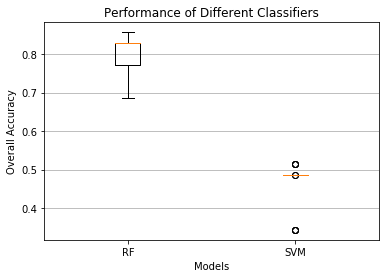

In [754]:
fig, ax = plt.subplots()

ax.boxplot(result)
ax.set_title('Performance of Different Classifiers')
ax.set_xlabel('Models')
ax.set_ylabel('Overall Accuracy')
xticklabels = ['RF', 'SVM']
# xticklabels=['5NN', 'RF', 'SVM', 'Basic']

ax.set_xticklabels(xticklabels)

# add horizontal grid lines
ax.yaxis.grid(True)
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()